**Nettopreise Outlier**

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#Einladen der Daten als Dataframe
df = pd.read_excel('Bestellungen.xlsx', sheet_name='Database')
df2 = pd.read_excel('Einkaufspreise.xlsx', sheet_name='Liste')

In [3]:
#Überprüfung der Daten
print(df.head())
print(df2.head())
print(df.groupby('Jahr')['MM_AMOUNT_POS'].sum())

      EBELN  EBELP STATU                        TXZ01  MATNR_Original  \
0  20153227      2   NaN           INDUCTOR    RDP704    4.002021e+09   
1  20154338      1   NaN                  SWA01-01649    6.326030e+05   
2  20154207      1   NaN  LEUCHTSTOFFLAMPE T5, FARBIG    1.006679e+06   
3  20154346      1   NaN     FALTKARTON (VERSAND) 48"    1.008856e+06   
4  20148006      1   NaN                DROSSEL, KPL.    4.108880e+05   

          MATNR  BUKRS  WERKS LGORT BEDNR   MATKL  KTMNG   MENGE MEINS  \
0  4.002021e+09     10     11  0001   NaN  051302      0    10.0    ST   
1  6.326030e+05     10     11  0038   REP  410102      0     1.0    ST   
2  1.006679e+06     10     14   NaN   NaN  410102      0  1500.0    ST   
3  1.008856e+06     10     14   NaN   NaN  510400      0   320.0    ST   
4  4.108880e+05     10     14  0010   NaN  051302      0    99.0    ST   

    NETPR  ...  KONNR  ZTERM  BSAKZ  STATU1      ERDAT  Jahr        AFNAM  \
0   15.25  ...    NaN   0900    NaN    

In [4]:
#Speicherung der in IDEA ausgewählten Werte in einer Liste
my_list = df2["MATNR"].values
print(my_list)

[9982680022 9982690029    1010242     948840     634762 9001660103
 1001690113     629100 2982483077     633314]


In [5]:
#Extraktion der Liste aus allen Bestellungen
outliers = df[df["MATNR"].isin(my_list)]

#outliers = df[df.MATNR == 9982680022]

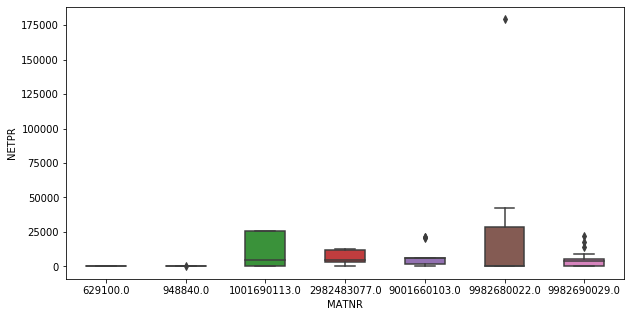

In [6]:
#Darstellung als Boxplot
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x="MATNR", y="NETPR", data=outliers, width=0.5)
plt.show()


Text(0.5, 0, 'Jahr')

Text(0, 0.5, 'NETPR')

Text(0.5, 1.0, 'Bestellungen')

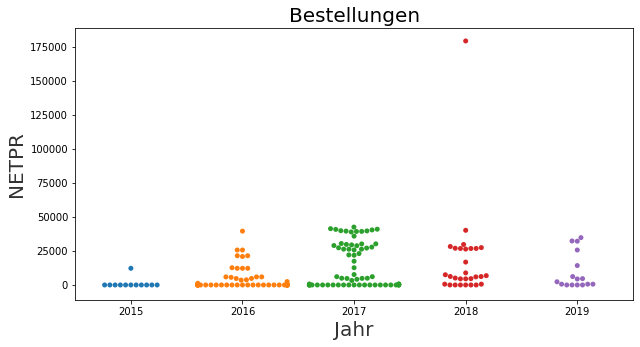

In [7]:
#Darstellung als Swarmplot
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.swarmplot(x="Jahr", y="NETPR",  data=outliers)
ax.set_xlabel("Jahr",size = 20,alpha=0.8)
ax.set_ylabel("NETPR",size = 20,alpha=0.8)
ax.set_title("Bestellungen",size=20)

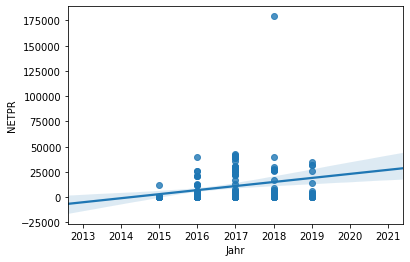

In [8]:
#Darstellung als Scaterplot mit Regression
sns.regplot(x=outliers["Jahr"], y=outliers["NETPR"])
plt.show()